1. (a)

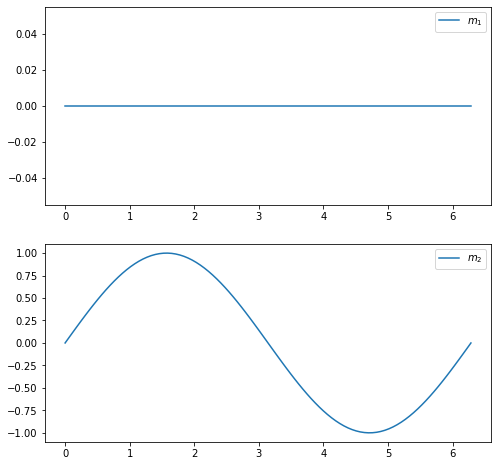

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def m1(x):
    x=np.asarray(x)
    y=np.zeros(x.shape)
    return y.tolist()

def m2(x):
    x=np.asarray(x)
    y=np.sin(x)
    return y.tolist()

x=np.linspace(0,2*np.pi,100).reshape(-1,1)
y1=m1(x)
y2=m2(x)

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(x,y1,label=r'$m_1$')
plt.legend()
plt.subplot(2,1,2)
plt.plot(x,y2,label=r'$m_2$')
plt.legend()
plt.show()

(b)

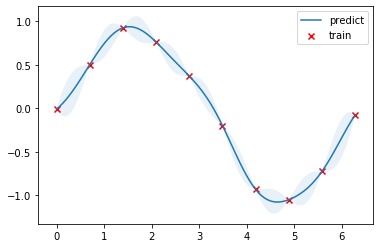

In [6]:
class GPR:
    
    def __init__(self,optimize=True):
        self.is_fit=False
        self.train_x,self.train_y=None,None
        # A=l^2, B=sigma^2
        self.param={"A":0.5,"B":1}
        self.optimize=optimize
    
    def gaussian_kernel(self,x1,x2):
        dist_mat=np.sum(x1**2,1).reshape(-1,1)+np.sum(x2**2,1)-2*np.dot(x1,x2.T)
        return self.param["B"]*np.exp(-0.5/self.param["A"]*dist_mat)
    
    def fit(self,x,y):
        self.train_x=np.asarray(x)
        self.train_y=np.asarray(y)
        self.is_fit=True
    
    def predict(self,x):
        x=np.asarray(x)
        Kff=self.gaussian_kernel(self.train_x,self.train_x)
        Kyy=self.gaussian_kernel(x,x)
        Kfy=self.gaussian_kernel(self.train_x,x)
        Kff_inv=np.linalg.inv(Kff+1e-8*np.eye(len(self.train_x)))
        
        mu=Kfy.T.dot(Kff_inv).dot(self.train_y)
        cov=Kyy-Kfy.T.dot(Kff_inv).dot(Kfy)
        
        return mu,cov

train_x=np.array([0,0.6981317,1.3962634,2.0943951,2.7925268,3.4906585,4.1887902,4.88692191,5.58505361,6.28318531]).reshape(-1,1)
train_y=np.array([-0.00799366,0.50389564,0.92653312,0.7628036,0.37189376,-0.1965461,-0.93017225,-1.04932639,-0.72417058,-0.07469816]).reshape(-1,1)
test_x=np.linspace(0,2*np.pi,100).reshape(-1,1)

gpr=GPR()
gpr.fit(train_x,train_y)
mu,cov=gpr.predict(test_x)
test_y=mu.ravel()
uncert=1.96*np.sqrt(np.diag(cov))

plt.figure()
plt.fill_between(test_x.ravel(),test_y.ravel()+uncert,test_y.ravel()-uncert,alpha=0.1)
plt.plot(test_x,test_y,label="predict")
plt.scatter(train_x,train_y,label="train",c="red",marker="x")
plt.legend()